Percentuale di valori mancanti per colonna:

Family          69.61
LanguageEase    26.87
ComAgeRec       25.22
ImagePath        0.08
Description      0.00
dtype: float64


C:\Users\lucon\AppData\Local\Temp\ipykernel_11552\2937487027.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Description"].fillna("No description available", inplace=True)
C:\Users\lucon\AppData\Local\Temp\ipykernel_11552\2937487027.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves


Valori imputati e colonne rimosse gestiti correttamente.


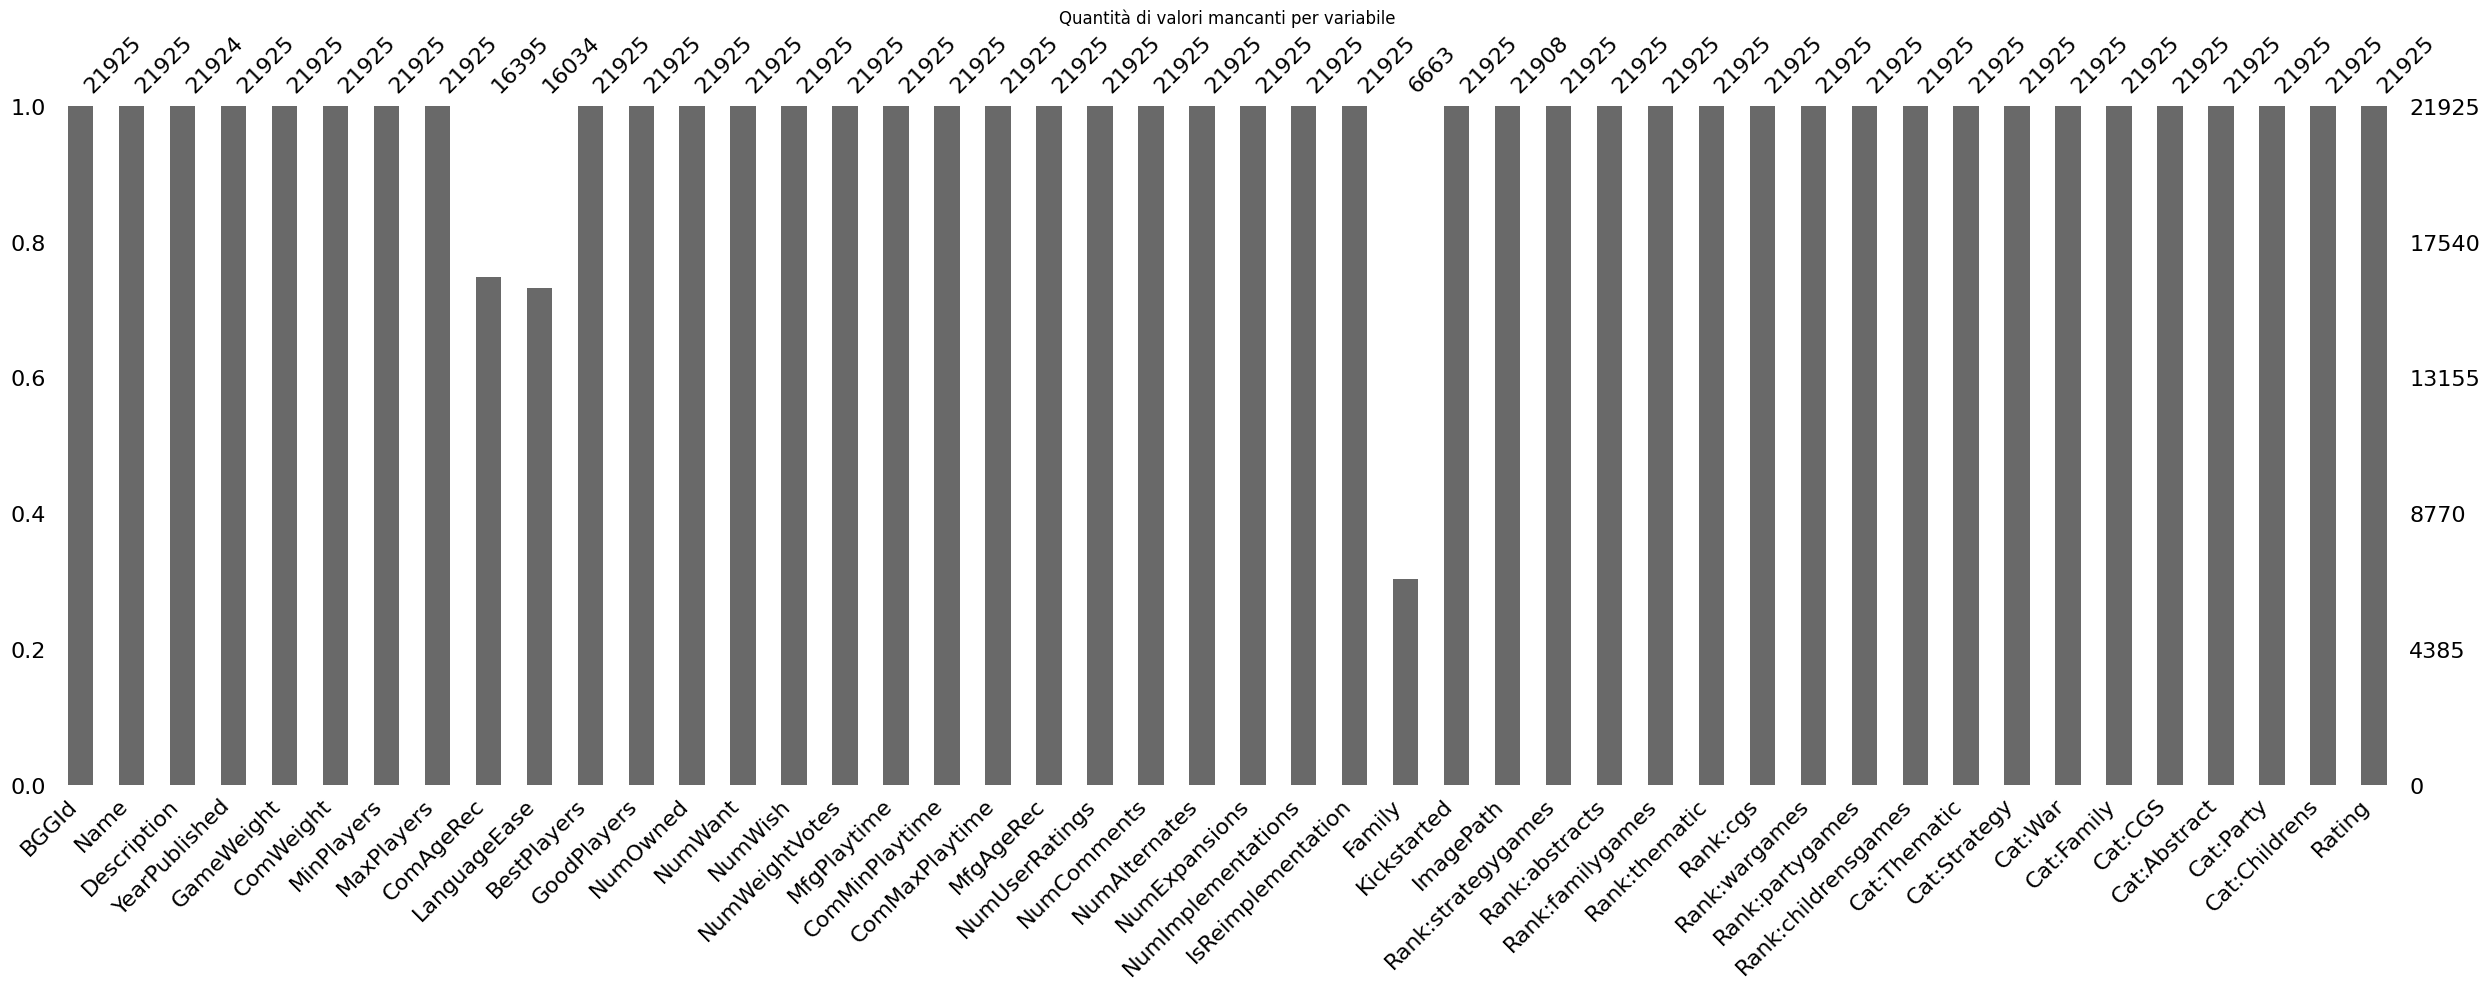

<Figure size 1000x600 with 0 Axes>

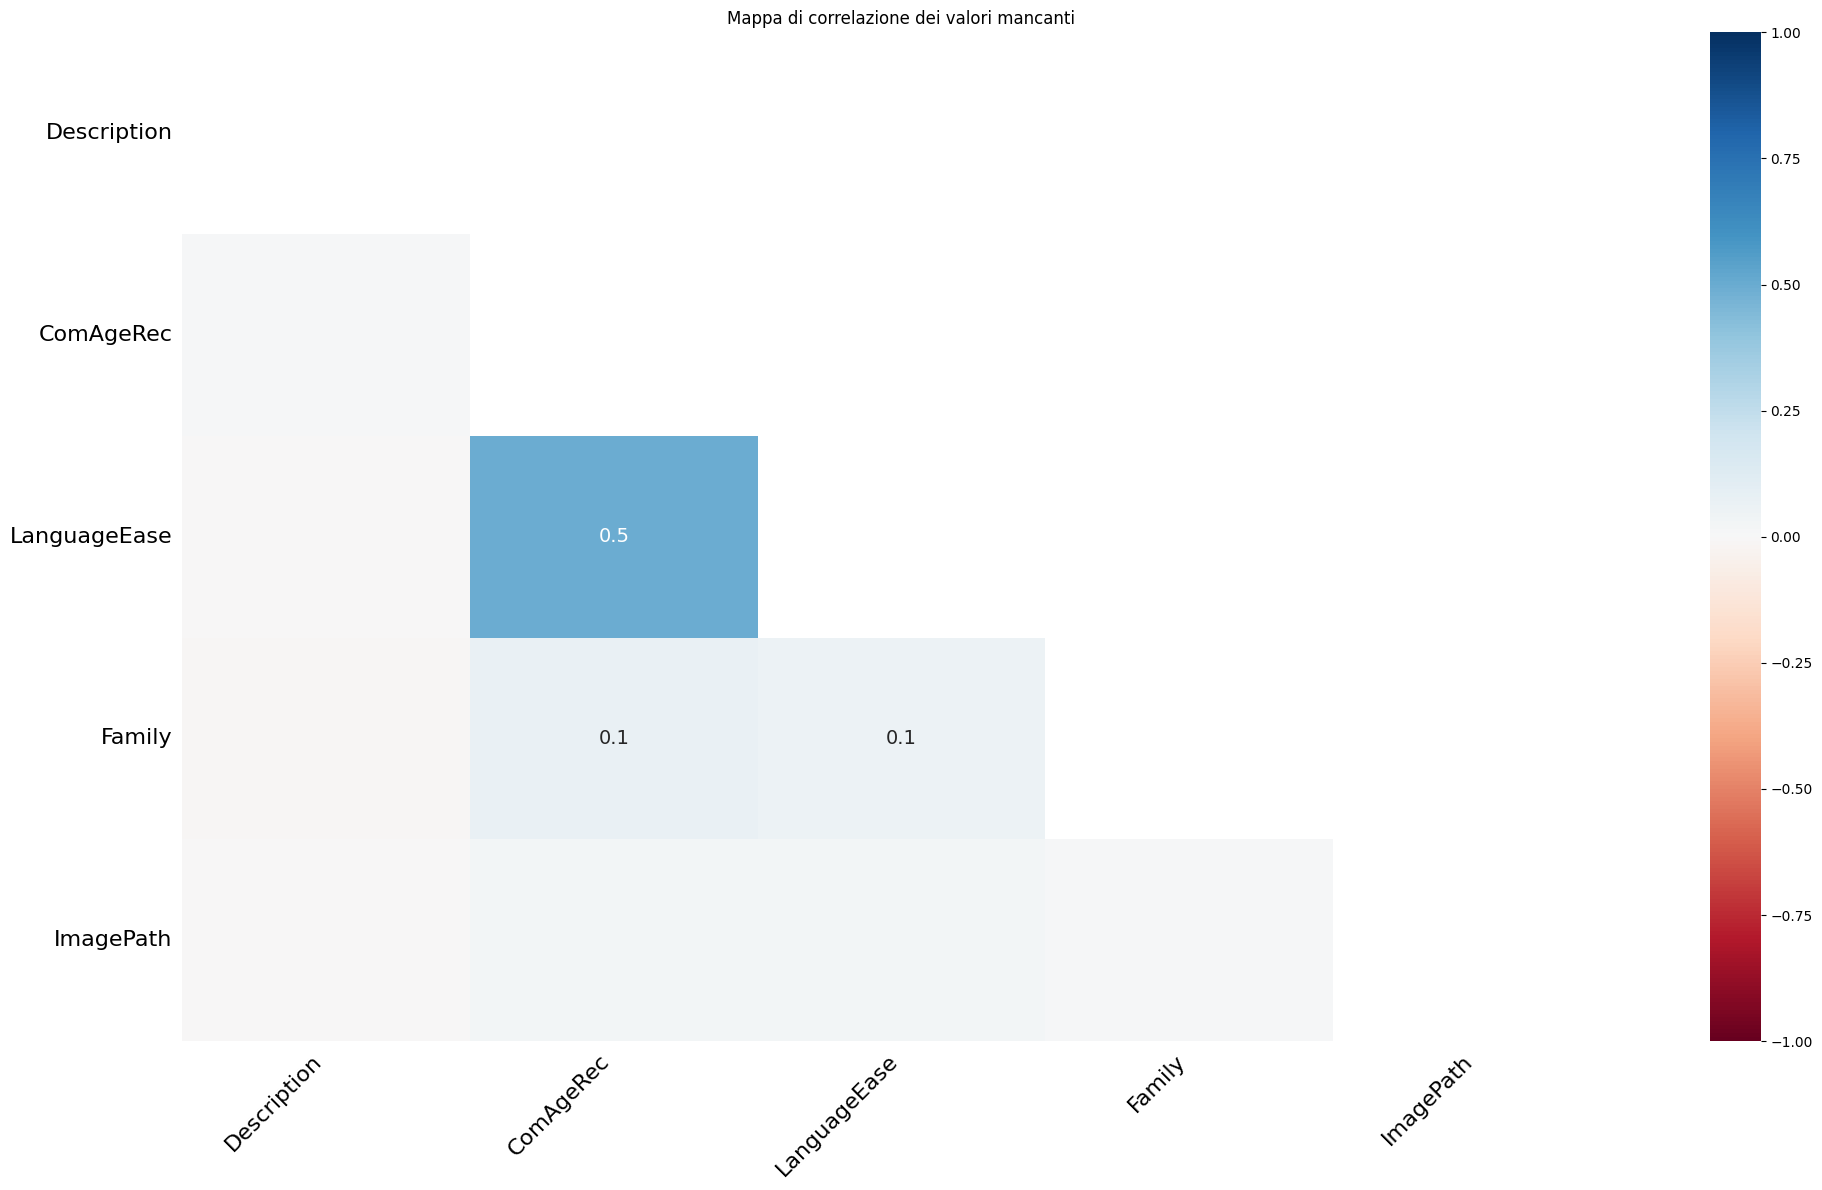

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

# Carica il dataset originale
df = pd.read_csv("DM1_game_dataset.csv")

# --- 1. Percentuale di valori mancanti per colonna ---
missing_percent = (df.isna().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print("Percentuale di valori mancanti per colonna:\n")
print(missing_percent.round(2))

# --- 2. Visualizzazione con heatmap e barplot ---
plt.figure(figsize=(8,5))
msno.bar(df)
plt.title("Quantità di valori mancanti per variabile")
plt.tight_layout()
plt.savefig("reports/figures/missing_bar.pdf")

plt.figure(figsize=(10,6))
msno.heatmap(df)
plt.title("Mappa di correlazione dei valori mancanti")
plt.tight_layout()
plt.savefig("reports/figures/missing_heatmap.pdf")

# --- 3. Gestione dei missing values ---
# Conversione dei tipi corretti prima della pulizia
df["Name"] = df["Name"].astype("string")
df["Description"] = df["Description"].astype("string")
df["ImagePath"] = df["ImagePath"].astype("string")
df["Rating"] = df["Rating"].astype("category")

# Rimozione della colonna 'Family' (troppi valori mancanti)
df.drop(columns=["Family"], inplace=True)

df["Description"].fillna("No description available", inplace=True)

# Imputazione per colonne numeriche (esempio: media o mediana)
df["ComAgeRec"].fillna(df["ComAgeRec"].median(), inplace=True)
df["LanguageEase"].fillna(df["LanguageEase"].median(), inplace=True)

# Se desideri mantenere un tracciamento dei NaN sostituiti
print("\nValori imputati e colonne rimosse gestiti correttamente.")

# --- 4. Salvataggio dataset aggiornato ---
df.to_csv("DM1_game_dataset_clean.csv", index=False)
#print("✅ Dataset pulito salvato in data/processed/DM1_game_dataset_clean.csv")



In [4]:
import pandas as pd

# Carica il dataset
df = pd.read_csv("DM1_game_dataset.csv")

# Calcola la percentuale di valori mancanti
missing = df.isna().mean() * 100

# Mostra solo le colonne con almeno un valore mancante
missing = missing[missing > 0].sort_values(ascending=False)

# Stampa in formato tabellare con due decimali
print("Percentuale di valori mancanti per colonna:\n")
print(missing.round(2).to_frame("Percentuale (%)"))


Percentuale di valori mancanti per colonna:

              Percentuale (%)
Family                  69.61
LanguageEase            26.87
ComAgeRec               25.22
ImagePath                0.08
Description              0.00


In [28]:
# Calcola il numero di valori mancanti per colonna
missing_count = df.isna().sum()

# Mostra solo le colonne che hanno almeno un valore mancante
missing_count = missing_count[missing_count > 0].sort_values(ascending=False)

# Stampa la tabella con due colonne: Attributo e Numero di valori mancanti
print("Numero di valori mancanti per colonna:\n")
print(missing_count.to_frame("Numero di valori mancanti"))

Numero di valori mancanti per colonna:

Empty DataFrame
Columns: [Numero di valori mancanti]
Index: []


In [27]:
df["Description"].fillna("No description available", inplace=True)
df["ImagePath"].fillna("No image available", inplace=True)
# Rimozione della colonna 'Family' (troppi valori mancanti)
df.drop(columns=["Family"], inplace=True)



C:\Users\lucon\AppData\Local\Temp\ipykernel_11552\2315789212.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Description"].fillna("No description available", inplace=True)
C:\Users\lucon\AppData\Local\Temp\ipykernel_11552\2315789212.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

KeyError: "['Family'] not found in axis"

In [23]:
cat_cols = [c for c in df.columns if c.startswith("Cat:")]
lang_by_cat = {c: df.loc[df[c] == 1, "LanguageEase"].mean(skipna=True) for c in cat_cols}
global_median = df["LanguageEase"].median()

def impute_lang(row):
    if pd.isna(row["LanguageEase"]):
        cats = [c for c in cat_cols if row[c] == 1]
        vals = [lang_by_cat[c] for c in cats if not np.isnan(lang_by_cat[c])]
        if vals:
            return np.mean(vals)
        else:
            return global_median
    return row["LanguageEase"]

df["LanguageEase"] = df.apply(impute_lang, axis=1)
# Verifica che non ci siano più NaN
print(df["ComAgeRec"].isna().sum())


0


In [19]:
import numpy as np
import pandas as pd

# Identifica le colonne di categoria
cat_cols = [c for c in df.columns if c.startswith("Cat:")]

# Calcola la media dell'età raccomandata per ogni categoria
age_by_cat = {
    cat: df.loc[df[cat] == 1, "ComAgeRec"].mean(skipna=True)
    for cat in cat_cols
}

# Calcola anche la media globale (per fallback)
global_mean_age = df["ComAgeRec"].mean(skipna=True)

# Funzione di imputazione
def impute_age(row):
    if pd.isna(row["ComAgeRec"]):
        # categorie attive per questo gioco
        active_cats = [c for c in cat_cols if row[c] == 1]
        # medie valide per le categorie attive
        valid_means = [age_by_cat[c] for c in active_cats if not np.isnan(age_by_cat[c])]
        if valid_means:
            return np.mean(valid_means)
        else:
            return global_mean_age  # se nessuna categoria utile
    else:
        return row["ComAgeRec"]

# Applica la funzione e aggiorna la colonna
df["ComAgeRec"] = df.apply(impute_age, axis=1)

# Verifica che non ci siano più NaN
print(df["ComAgeRec"].isna().sum())


0


In [29]:
# --- 4. Salvataggio dataset aggiornato ---
df.to_csv("DM1_game_dataset_clean_missval.csv", index=False)